# Read data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import udf

In [2]:
df = pd.read_csv("obama_speech_preprocessed.csv")

In [3]:
df_sentiment = df.drop(columns=['processed_for_lda'])

# Sentiment analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
df_sentiment['sentiment'] = df_sentiment['processed_for_sentiment'].apply(lambda x : udf.sentiment.blob_sentiment(x))
df_sentiment['analysis'] = df_sentiment['sentiment'].apply(lambda x: udf.sentiment.getAnalysis(x))

<AxesSubplot:>

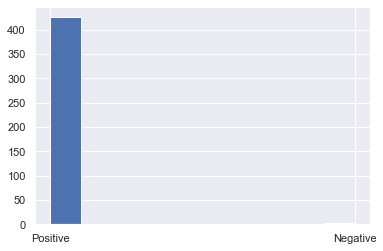

In [6]:
df_sentiment['analysis'].hist()

<AxesSubplot:>

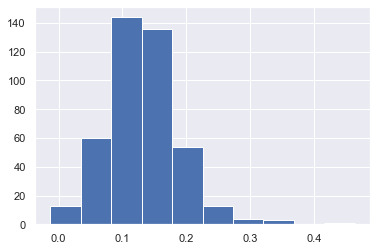

In [7]:
df_sentiment['sentiment'].hist()

Text(0.5, 1.0, 'Sentiment - TextBlob')

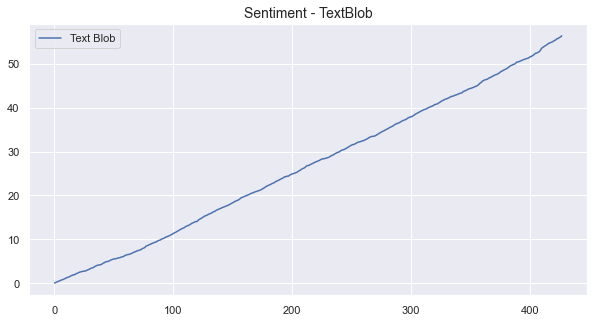

In [8]:
fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(np.arange(0,len(df)),df_sentiment['sentiment'].cumsum(),label='Text Blob')
ax.legend()
ax.set_title('Sentiment - TextBlob',fontsize=14)